In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [6]:
df_train = pd.read_csv("C:/Users/liked/Desktop/data/Mnist/train.csv")
df_test = pd.read_csv("C:/Users/liked/Desktop/data/Mnist/test.csv")
df_train.shape, df_test.shape

((42000, 785), (28000, 784))

In [7]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_train_label = df_train.label

In [9]:
df_train = df_train.drop('label',axis=1)

In [10]:
df_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


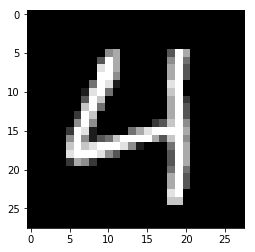

In [12]:
plt.imshow(np.asarray(df_train.loc[205]).reshape(28,28), cmap='gray')

In [13]:
df_train.shape

(42000, 784)

In [14]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train_label, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [17]:
X_train_ar = np.array(X_train)
X_test_ar = np.array(X_test)

In [18]:
X_train_ar = X_train_ar.reshape(33600, 28, 28)

In [19]:
X_test_ar = X_test_ar.reshape(8400,28,28)

In [20]:
X_train = X_train_ar
X_test = X_test_ar

In [21]:
X_train = X_train.reshape(33600,28,28,1)
X_test = X_test.reshape(8400,28,28,1)

In [1]:
import tensorflow
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

Using TensorFlow backend.


In [22]:
IMG_CHANNELS = 1
IMG_ROWS = 28
IMG_COLS = 28 

In [23]:
BATCH_SIZE = 500
NB_EPOCH = 20
#NB_EPOCH = 1
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

In [25]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255

In [26]:
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
model = Sequential()
model.add(Conv2D(64,(5,5),padding='same',input_shape=(IMG_ROWS,IMG_COLS,IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32,(4,4),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        32800     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 32)       

In [28]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE,
                   epochs=NB_EPOCH,validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing')
score = model.evaluate(X_test,Y_test,batch_size=BATCH_SIZE,verbose=VERBOSE)
print('\nTest score :',score[0])
print('Test accuracy :',score[1])

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (33600, 784)